In [1]:
import pandas as pd
import numpy as np

# Clustering & Metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# For Visualizations
import matplotlib.pyplot as plt

In [2]:
# Load dataset (already uploaded)
df = pd.read_csv("Data/digital_marketing_campaign_dataset.csv")

In [3]:
for col_to_drop in ["CustomerID", "AdvertisingPlatform", "AdvertisingTool"]:
    if col_to_drop in df.columns:
        df.drop(columns=[col_to_drop], inplace=True)

In [4]:
print("DataFrame shape:", df.shape)
print(df.info())  # Columns, types, non-null counts
df.head()

DataFrame shape: (8000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                8000 non-null   int64  
 1   Gender             8000 non-null   object 
 2   Income             8000 non-null   int64  
 3   CampaignChannel    8000 non-null   object 
 4   CampaignType       8000 non-null   object 
 5   AdSpend            8000 non-null   float64
 6   ClickThroughRate   8000 non-null   float64
 7   ConversionRate     8000 non-null   float64
 8   WebsiteVisits      8000 non-null   int64  
 9   PagesPerVisit      8000 non-null   float64
 10  TimeOnSite         8000 non-null   float64
 11  SocialShares       8000 non-null   int64  
 12  EmailOpens         8000 non-null   int64  
 13  EmailClicks        8000 non-null   int64  
 14  PreviousPurchases  8000 non-null   int64  
 15  LoyaltyPoints      8000 non-null   int64  
 

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1


In [5]:
# 3.1 Encode Gender (if it exists in the dataset)
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# 3.2 One-hot encode multi-category features
categorical_cols = []
for cat_col in ['CampaignChannel', 'CampaignType']:
    if cat_col in df.columns:
        categorical_cols.append(cat_col)

# Apply one-hot encoding
if categorical_cols:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [6]:
# Check transformations
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           8000 non-null   int64  
 1   Gender                        8000 non-null   int64  
 2   Income                        8000 non-null   int64  
 3   AdSpend                       8000 non-null   float64
 4   ClickThroughRate              8000 non-null   float64
 5   ConversionRate                8000 non-null   float64
 6   WebsiteVisits                 8000 non-null   int64  
 7   PagesPerVisit                 8000 non-null   float64
 8   TimeOnSite                    8000 non-null   float64
 9   SocialShares                  8000 non-null   int64  
 10  EmailOpens                    8000 non-null   int64  
 11  EmailClicks                   8000 non-null   int64  
 12  PreviousPurchases             8000 non-null   int64  
 13  Loy

,Age,Gender,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,...,PreviousPurchases,LoyaltyPoints,Conversion,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
0,56,0,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,...,4,688,1,False,False,False,True,False,False,False
1,69,1,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,...,2,3459,1,False,False,False,False,False,False,True
2,46,0,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,...,8,2337,1,True,False,False,False,False,False,False
3,32,0,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,...,0,2463,1,True,False,False,False,False,True,False
4,60,0,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,...,8,4345,1,True,False,False,False,False,True,False


In [7]:
# Confirm no more missing
print("Missing values after drop:", df.isna().sum().sum())

Missing values after drop: 0


In [8]:
# 5.1 Engagement Ratio Example:
# EngagementRatio = (EmailClicks + SocialShares) / (WebsiteVisits + 1)
if all(col in df.columns for col in ['EmailClicks', 'SocialShares', 'WebsiteVisits']):
    df['EngagementRatio'] = (df['EmailClicks'] + df['SocialShares']) / (df['WebsiteVisits'] + 1)

# 5.2 AverageTimePerVisit
# If TimeOnSite and WebsiteVisits are present
if all(col in df.columns for col in ['TimeOnSite', 'WebsiteVisits']):
    df['AvgTimePerVisit'] = df['TimeOnSite'] / (df['WebsiteVisits'] + 1)

# 5.3 CustomerValue
# For instance, combine previous purchases and loyalty points
if all(col in df.columns for col in ['PreviousPurchases', 'LoyaltyPoints']):
    df['CustomerValue'] = df['PreviousPurchases'] + df['LoyaltyPoints'] * 0.01
    # The factor 0.01 is arbitrary; adjust based on scale or domain knowledge.

In [9]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           8000 non-null   int64  
 1   Gender                        8000 non-null   int64  
 2   Income                        8000 non-null   int64  
 3   AdSpend                       8000 non-null   float64
 4   ClickThroughRate              8000 non-null   float64
 5   ConversionRate                8000 non-null   float64
 6   WebsiteVisits                 8000 non-null   int64  
 7   PagesPerVisit                 8000 non-null   float64
 8   TimeOnSite                    8000 non-null   float64
 9   SocialShares                  8000 non-null   int64  
 10  EmailOpens                    8000 non-null   int64  
 11  EmailClicks                   8000 non-null   int64  
 12  PreviousPurchases             8000 non-null   int64  
 13  Loy

,Age,Gender,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,...,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention,EngagementRatio,AvgTimePerVisit,CustomerValue
0,56,0,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,...,False,False,False,True,False,False,False,28.000000,7.396803,10.88
1,69,1,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,...,False,False,False,False,False,False,True,0.279070,0.124478,36.59
2,46,0,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,...,True,False,False,False,False,False,False,0.666667,4.598300,31.37
3,32,0,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,...,True,False,False,False,False,True,False,1.895833,0.306008,24.63
4,60,0,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,...,True,False,False,False,False,True,False,12.000000,13.993370,51.45


In [10]:
df_clean = df

In [ ]:
# Use all variables from the cleaned DataFrame for clustering
X = df_clean.copy()

# If the DataFrame already has a 'Cluster' column (from previous runs), remove it:
if 'Cluster' in X.columns:
    X.drop(columns=['Cluster'], inplace=True)

print("Using all features for clustering:")
print(X.head())

Using these features for clustering: ['Age', 'Gender', 'Income', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'PreviousPurchases', 'LoyaltyPoints', 'EngagementRatio', 'AvgTimePerVisit', 'CustomerValue', 'CampaignChannel_PPC', 'CampaignChannel_Referral', 'CampaignChannel_SEO', 'CampaignChannel_Social Media', 'CampaignType_Consideration', 'CampaignType_Conversion', 'CampaignType_Retention']
   Age  Gender  Income  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0   56       0  136912              0       2.399017    7.396803   
1   69       1   41760             42       2.917138    5.352549   
2   46       0   88456              2       8.223619   13.794901   
3   32       0   44085             47       4.540939   14.688363   
4   60       0   83964              0       2.046847   13.993370   

   PreviousPurchases  LoyaltyPoints  EngagementRatio  AvgTimePerVisit  \
0                  4            688        28.000000         7.396803   
1                  2           3459         0.2790

In [12]:
len(features_for_clustering)

18

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
pca = PCA(n_components=5, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance by 5 PCA components:", pca.explained_variance_ratio_)

Explained variance by 5 PCA components: [0.12093923 0.11149666 0.07515493 0.07415055 0.07029194]


In [15]:
def test_kmeans_silhouette(X_data, k_range=range(2,21), random_state=42):
    results = []
    for k in k_range:
        kmeans_temp = KMeans(n_clusters=k, random_state=random_state)
        labels_temp = kmeans_temp.fit_predict(X_data)
        sil = silhouette_score(X_data, labels_temp)
        results.append((k, sil))
    return results

k_range = range(2,21)
scores_no_pca = test_kmeans_silhouette(X_scaled, k_range)
scores_pca = test_kmeans_silhouette(X_pca, k_range)

print("No PCA silhouette scores:", scores_no_pca)
print("PCA silhouette scores:", scores_pca)

No PCA silhouette scores: [(2, 0.08277702020589939), (3, 0.10145233312240268), (4, 0.1067391230947538), (5, 0.10235077459314529), (6, 0.09529712623829485), (7, 0.09449402690024533), (8, 0.09575547427870544), (9, 0.08947555529611943), (10, 0.09354737143763904), (11, 0.0960869025108246), (12, 0.09521921446954025), (13, 0.09955869628731173), (14, 0.10011199637140875), (15, 0.10061213300030866), (16, 0.10342459272281233), (17, 0.10162086916733884), (18, 0.10066227126379053), (19, 0.10677618360730377), (20, 0.10501100962872224)]
PCA silhouette scores: [(2, 0.4172082719366), (3, 0.1955505786323778), (4, 0.21266142162079085), (5, 0.22748916676719108), (6, 0.23230634766617844), (7, 0.2227168488317281), (8, 0.2478670179826452), (9, 0.24992137722177596), (10, 0.24378747903881734), (11, 0.23141462826826245), (12, 0.2190032085248876), (13, 0.23509481623755546), (14, 0.2505317375594736), (15, 0.2631348344990398), (16, 0.25693701575855216), (17, 0.24993451447161197), (18, 0.25634931573176434), (19, 

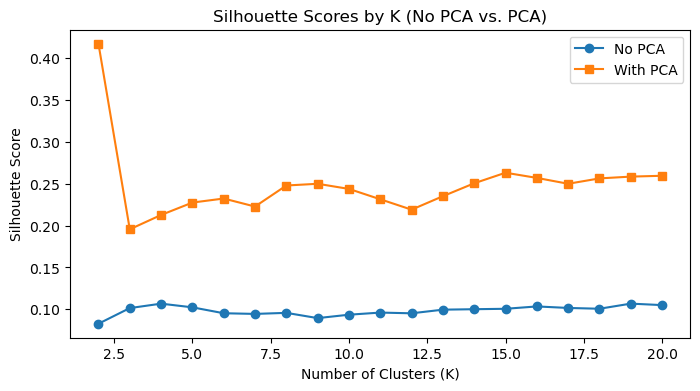

In [16]:
plt.figure(figsize=(8, 4))

# Plot no-PCA
ks_no_pca = [item[0] for item in scores_no_pca]
sil_no_pca = [item[1] for item in scores_no_pca]
plt.plot(ks_no_pca, sil_no_pca, marker='o', label='No PCA')

# Plot with PCA
ks_pca = [item[0] for item in scores_pca]
sil_pca = [item[1] for item in scores_pca]
plt.plot(ks_pca, sil_pca, marker='s', label='With PCA')

plt.title("Silhouette Scores by K (No PCA vs. PCA)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

In [17]:
# Example: let’s say we pick K=4 from the no-PCA results
best_k = 4
use_pca = False

if use_pca:
    final_data = X_pca
else:
    final_data = X_scaled

kmeans_final = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(final_data)

df_clean['Cluster'] = cluster_labels

df_clean['Cluster'].value_counts()

Cluster
0    3921
2    1920
1    1875
3     284
Name: count, dtype: int64

In [18]:
cluster_profile = df_clean.groupby('Cluster')[features_for_clustering].mean().round(2)
print("Cluster Profile (Mean Values):\n", cluster_profile)

Cluster Profile (Mean Values):
            Age  Gender    Income  WebsiteVisits  PagesPerVisit  TimeOnSite  \
Cluster                                                                      
0        43.38    0.38  84771.98          25.44           5.58        7.74   
1        44.15    0.40  84594.40          25.50           5.50        7.61   
2        43.58    0.41  84148.79          26.17           5.58        7.57   
3        43.91    0.39  87121.37           0.73           5.27        9.37   

         PreviousPurchases  LoyaltyPoints  EngagementRatio  AvgTimePerVisit  \
Cluster                                                                       
0                     4.48        2499.26             3.30             0.48   
1                     4.50        2478.74             3.23             0.47   
2                     4.52        2485.23             3.17             0.45   
3                     4.29        2476.39            41.68             6.31   

         CustomerValue  